In [1]:
load('d.RData')
d

,x,y
1,3,5
2,3.210526,3
3,3.421053,6
4,3.631579,7
5,3.842105,7
6,4.052632,5
7,4.263158,9
8,4.473684,9
9,4.684211,7
10,4.894737,10


In [2]:
fit <- glm(y ~ x, data=d, family=poisson)
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.56606      0.08334  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    15.66 
Residual Deviance: 14.17 	AIC: 94.04

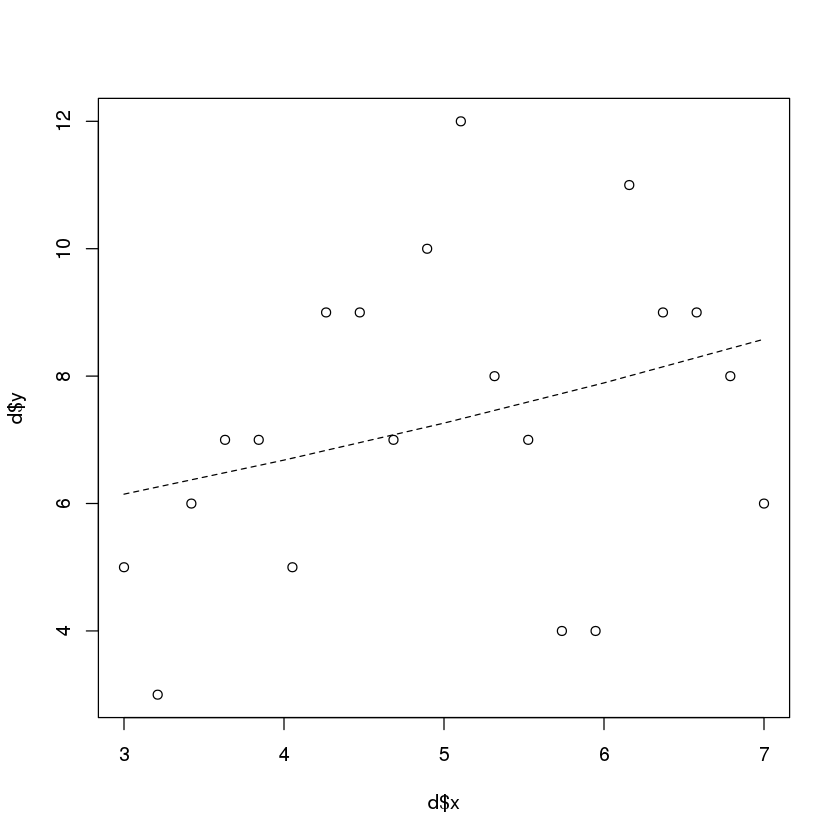

In [3]:
plot(d$x, d$y)
xx <- 3:7
lines(xx, exp(1.56606 + 0.08334 * xx), lty=2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 2
   Total graph size: 129

Initializing model


Iterations = 1103:2600
Thinning interval = 3 
Number of chains = 3 
Sample size per chain = 500 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD Naive SE Time-series SE
beta1 1.97872 0.08430 0.002177       0.002592
beta2 0.08432 0.06639 0.001714       0.001744

2. Quantiles for each variable:

          2.5%     25%     50%    75%  97.5%
beta1  1.81280 1.92171 1.98386 2.0364 2.1390
beta2 -0.04313 0.04141 0.08188 0.1297 0.2118



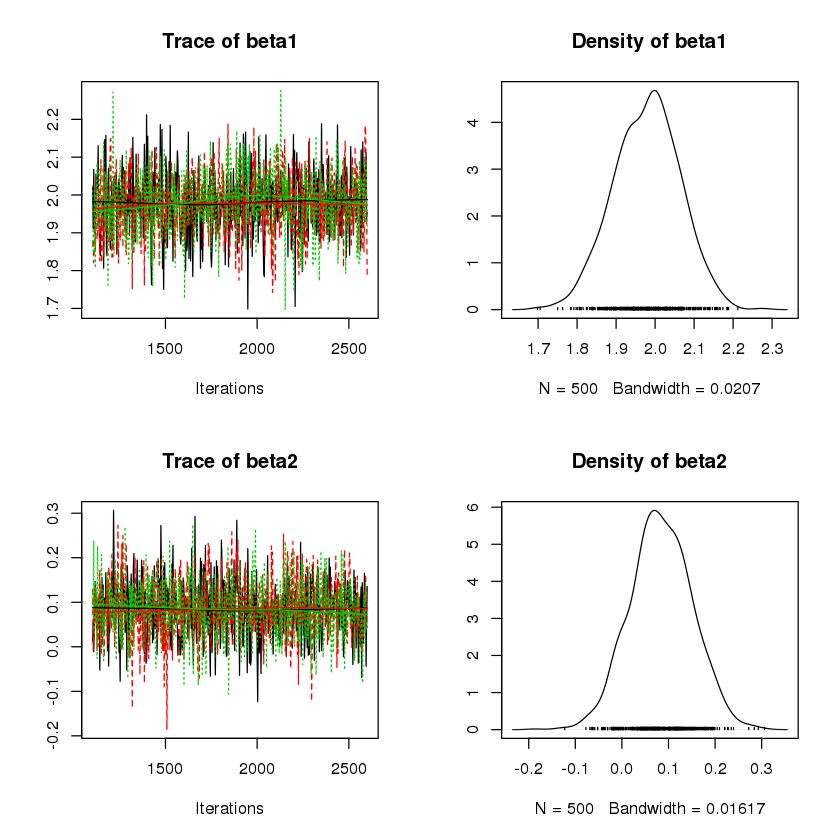

In [7]:
library(rjags)

list.data <- list(
    N = nrow(d),
    Y = d$y,
    X = d$x,
    Mean.X = mean(d$x)
)

inits <- list(
    beta1 = 0,
    beta2 = 0
)

m <- jags.model(
    file = "model.bug.txt",
    data = list.data,
    inits = inits,
    n.chains = 3
)

update(m, 100)

x <- coda.samples(
    m,
    c("beta1", "beta2"),
    thin = 3,
    n.iter = 1500
)

print(summary(x))
plot(x)

In [50]:
beta1 <- as.matrix(x)[, 'beta1']
beta2 <- as.matrix(x)[, 'beta2']
length(beta1)

[1] 1500

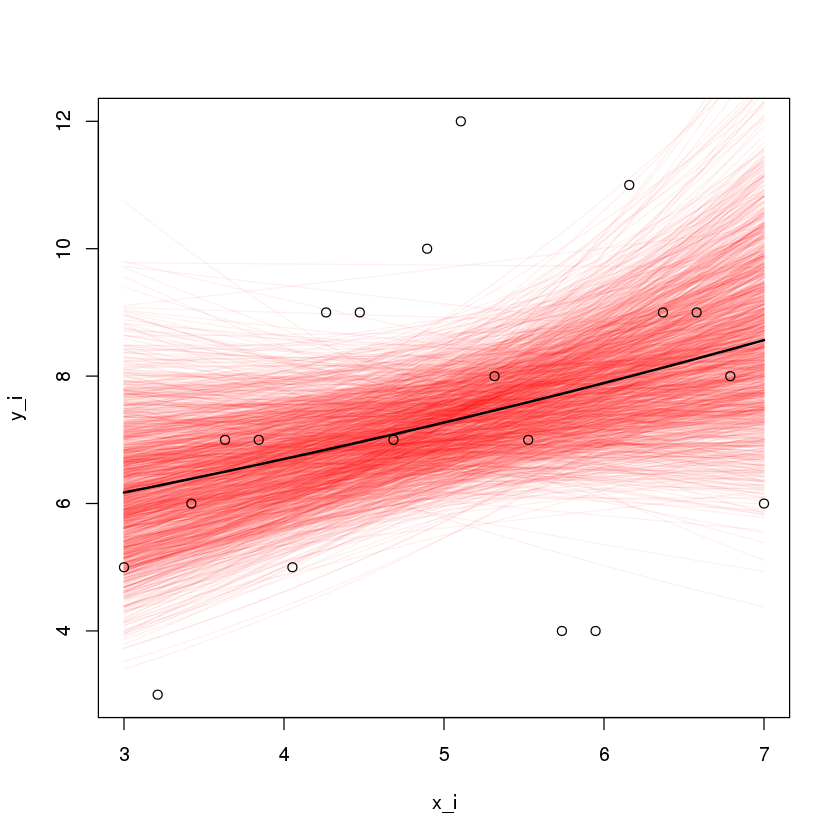

In [54]:
add.mean <- function(bb1, bb2, lty = 2, lwd = 1, ...) {
    lines(d$x, exp(bb1 + bb2 * (d$x - mean(d$x))), lty = lty, lwd = lwd, ...)
}
plot(d$x, d$y, type = "n", xlab = "x_i", ylab = "y_i")
for (i in 1:length(beta1)) {
    add.mean(beta1[i], beta2[i], lty = 1, col = "#ff000010")
}
points(d$x, d$y)
add.mean(median(beta1), median(beta2), lty = 1, lwd = 2)

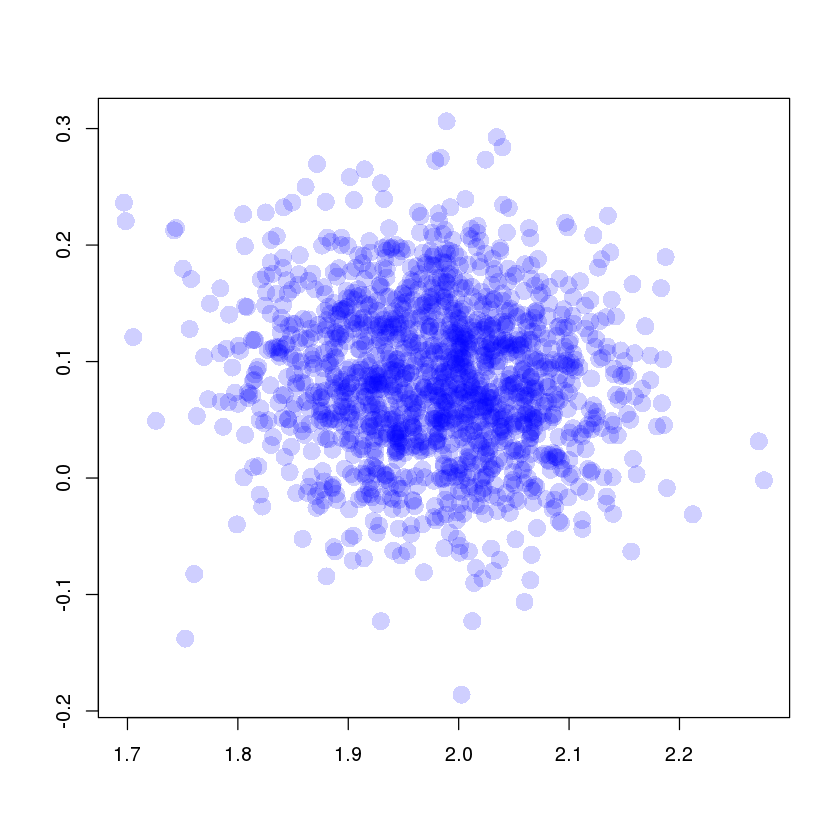

In [57]:
plot(
    as.matrix(x),
    lty = 1, col = "#0000ff30",
    pch = 16, cex = 2,
    xlab = "", ylab = ""
)

Quantiles を見ると、$\beta_2$ の 2.5% quantile は 0 を下回っている。はたして $\beta_2$ が 0 以上になる確率は？

In [58]:
mean(beta2 > 0)

[1] 0.8986667